In [79]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from thor.option.default_input import input_options
from thor.data.aura import generate_operational_urls 
from thor.data.access import generate_access_urls 
from thor.data.utils import download_file, unzip_file, consolidate_netcdf
from thor.data.odim import convert_odim
import xarray as xr
import tempfile
from thor.data.access import check_options
import thor.data.era5 as era5
import thor.grid as grid
import thor.data.wrf as wrf

notebook_name = "input.ipynb"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
options = wrf.create_options()
wrf.check_options(options)
urls, times = wrf.generate_MCASClimate_urls(options)
urls

{'U': ['https://dapds00.nci.org.au/thredds/dodsC/ks32/ARCCSS_Data/MCASClimate/v1-0/20092010/U/U_WRF_Maritime_Continent_4km_20100201.nc',
  'https://dapds00.nci.org.au/thredds/dodsC/ks32/ARCCSS_Data/MCASClimate/v1-0/20092010/U/U_WRF_Maritime_Continent_4km_20100202.nc',
  'https://dapds00.nci.org.au/thredds/dodsC/ks32/ARCCSS_Data/MCASClimate/v1-0/20092010/U/U_WRF_Maritime_Continent_4km_20100203.nc',
  'https://dapds00.nci.org.au/thredds/dodsC/ks32/ARCCSS_Data/MCASClimate/v1-0/20092010/U/U_WRF_Maritime_Continent_4km_20100204.nc',
  'https://dapds00.nci.org.au/thredds/dodsC/ks32/ARCCSS_Data/MCASClimate/v1-0/20092010/U/U_WRF_Maritime_Continent_4km_20100205.nc'],
 'V': ['https://dapds00.nci.org.au/thredds/dodsC/ks32/ARCCSS_Data/MCASClimate/v1-0/20092010/V/V_WRF_Maritime_Continent_4km_20100201.nc',
  'https://dapds00.nci.org.au/thredds/dodsC/ks32/ARCCSS_Data/MCASClimate/v1-0/20092010/V/V_WRF_Maritime_Continent_4km_20100202.nc',
  'https://dapds00.nci.org.au/thredds/dodsC/ks32/ARCCSS_Data/MCAS

In [91]:
test = xr.open_dataset(urls['U'][0], chunks={})

In [93]:
test.time

<xarray.DataArray 'time' (time: 24)> Size: 192B
array(['2010-02-01T00:00:00.000000000', '2010-02-01T01:00:00.000000000',
       '2010-02-01T02:00:00.000000000', '2010-02-01T03:00:00.000000000',
       '2010-02-01T04:00:00.000000000', '2010-02-01T05:00:00.000000000',
       '2010-02-01T06:00:00.000000000', '2010-02-01T07:00:00.000000000',
       '2010-02-01T08:00:00.000000000', '2010-02-01T09:00:00.000000000',
       '2010-02-01T10:00:00.000000000', '2010-02-01T11:00:00.000000000',
       '2010-02-01T12:00:00.000000000', '2010-02-01T13:00:00.000000000',
       '2010-02-01T14:00:00.000000000', '2010-02-01T15:00:00.000000000',
       '2010-02-01T16:00:00.000000000', '2010-02-01T17:00:00.000000000',
       '2010-02-01T18:00:00.000000000', '2010-02-01T19:00:00.000000000',
       '2010-02-01T20:00:00.000000000', '2010-02-01T21:00:00.000000000',
       '2010-02-01T22:00:00.000000000', '2010-02-01T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 192B 2010-02-01 ... 2010-02-01T23:00:00
Attributes:
    long_name:    time
    _ChunkSizes:  24

In [78]:
grid.create_options(save=True)

{'timestep': None,
 'start_latitude': None,
 'end_latitude': None,
 'start_longitude': None,
 'end_longitude': None,
 'central_latitude': None,
 'central_longitude': None,
 'projection': None,
 'start_x': -150000.0,
 'end_x': -150000.0,
 'start_y': -150000.0,
 'end_y': 150000.0,
 'start_z': 0,
 'end_z': 25000.0,
 'grid_spacing': [500, 2500, 2500]}

In [70]:
options = input_options(
    name="operational",
    start='2022-02-01T12:00:00',
    end='2023-02-01T18:30:00',
    level="1b",
    radar="63",
    format="ODIM",
    parent="https://dapds00.nci.org.au/thredds/fileServer/rq0",
)
options

{'name': 'operational',
 'start': '2022-02-01T12:00:00',
 'end': '2023-02-01T18:30:00',
 'format': 'ODIM',
 'timestep': None,
 'start_latitude': None,
 'end_latitude': None,
 'start_longitude': None,
 'end_longitude': None,
 'parent': 'https://dapds00.nci.org.au/thredds/fileServer/rq0',
 'level': '1b',
 'radar': '63'}

In [73]:
from thor.test.test_setup import test_aura_setup, test_access_setup

In [72]:
test_aura_setup()

2024-04-19 15:03:37,941 - thor.data.aura - DEBUG - Saving options to /home/ewan/Documents/THOR/thor/option/default/aura.yaml
2024-04-19 15:03:37,951 - thor.data.utils - DEBUG - Initiating download of https://dapds00.nci.org.au/thredds/fileServer/rq0/63/2005/vol/63_20050201.pvol.zip...
2024-04-19 15:03:37,952 - thor.data.utils - DEBUG - Sending HTTP request to https://dapds00.nci.org.au/thredds/fileServer/rq0/63/2005/vol/63_20050201.pvol.zip.


KeyboardInterrupt: 

In [76]:
test_access_setup()

2024-04-19 15:07:28,088 - thor.data.access - DEBUG - Saving options to /home/ewan/Documents/THOR/thor/option/default/access.yaml


In [ ]:
import inspect
inspect.getfullargspec(generate_operational_urls).args

['options']

In [ ]:
check_options(options)

KeyError: 'mode'

In [ ]:
start = pd.Timestamp(options["start"])
end = pd.Timestamp(options["end"])

urls = []

coarse_times = np.arange(
    np.datetime64(f"{start.year:04}-{start.month:02}"),
    np.datetime64(f"{end.year:04}-{end.month:02}")+np.timedelta64(1, "M"),
    np.timedelta64(1, "M"),
)
coarse_times

array(['2005-02'], dtype='datetime64[M]')

In [ ]:
coarse_time = pd.Timestamp(coarse_times[0])
era5.format_daterange(coarse_time.year, coarse_time.month)

'20220201-20220228'

In [ ]:
options = era5.create_options()
era5.check_options(options)
urls, times = era5.generate_era5_urls(options)
urls['u'][0]

'/g/data/rt52/era5/pressure-levels/reanalysis/u/2005/u_era5_oper_pl_20050201-20050228.nc'

In [ ]:
urlsaccess

{'u': ['/g/data/rt52/era5/pressure-levels/reanalysis/2005/u/era5_oper_u_20050201-20050228.nc',
  '/g/data/rt52/era5/pressure-levels/reanalysis/2005/u/era5_oper_u_20050301-20050331.nc',
  '/g/data/rt52/era5/pressure-levels/reanalysis/2005/u/era5_oper_u_20050401-20050430.nc',
  '/g/data/rt52/era5/pressure-levels/reanalysis/2005/u/era5_oper_u_20050501-20050531.nc',
  '/g/data/rt52/era5/pressure-levels/reanalysis/2005/u/era5_oper_u_20050601-20050630.nc',
  '/g/data/rt52/era5/pressure-levels/reanalysis/2005/u/era5_oper_u_20050701-20050731.nc',
  '/g/data/rt52/era5/pressure-levels/reanalysis/2005/u/era5_oper_u_20050801-20050831.nc',
  '/g/data/rt52/era5/pressure-levels/reanalysis/2005/u/era5_oper_u_20050901-20050930.nc',
  '/g/data/rt52/era5/pressure-levels/reanalysis/2005/u/era5_oper_u_20051001-20051031.nc',
  '/g/data/rt52/era5/pressure-levels/reanalysis/2005/u/era5_oper_u_20051101-20051130.nc',
  '/g/data/rt52/era5/pressure-levels/reanalysis/2005/u/era5_oper_u_20051201-20051231.nc',
  '/g

In [ ]:
test = xr.open_dataset(urls["uwnd10m"][0])

Note:Caching=1


In [ ]:
pd.Timestamp('2022-02-01T24:00:00')

DateParseError: hour must be in 0..23: 2022-02-01T24:00:00

In [ ]:
import calendar
calendar.monthrange(2020, 2)

Help on function monthrange in module calendar:

monthrange(year, month)
    Return weekday (0-6 ~ Mon-Sun) and number of days (28-31) for
    year, month.



In [ ]:
filepath = download_file(urls[0], '/home/ewan/Documents/turbulence_postdoc/demo_data/')

2024-04-16 17:51:21,064 - thor.data.utils - DEBUG - /home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113_grid.zip already exists.


In [ ]:
extracted_filepaths, dir_size = unzip_file(filepath)

In [ ]:
sorted(extracted_filepaths)

['/home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113_grid/63_20051113_022004_grid.nc',
 '/home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113_grid/63_20051113_023004_grid.nc',
 '/home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113_grid/63_20051113_024003_grid.nc',
 '/home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113_grid/63_20051113_025003_grid.nc',
 '/home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113_grid/63_20051113_030004_grid.nc',
 '/home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113_grid/63_20051113_031004_grid.nc',
 '/home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113_grid/63_20051113_032003_grid.nc',
 '/home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113_grid/63_20051113_033004_grid.nc',
 '/home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113_grid/63_20051113_034003_grid.nc',
 '/home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113_grid/63_20051113_035004_grid.nc',
 '/home/ewan/Documen

In [ ]:
dataset = consolidate_netcdf(extracted_filepaths, fields=['corrected_reflectivity', 'latitude', 'longitude'])

In [ ]:
dataset = convert_odim(extracted_filepaths, options)

2024-04-16 15:42:02,793 - thor.data.odim - DEBUG - Converting /home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113.pvol/63_20051113_022004.pvol.h5 to pyart.
2024-04-16 15:42:02,952 - thor.data.odim - DEBUG - Gridding /home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113.pvol/63_20051113_022004.pvol.h5.
2024-04-16 15:42:08,018 - thor.data.odim - DEBUG - Converting {filepath} to xarray.
2024-04-16 15:52:34,787 - thor.data.odim - DEBUG - Converting /home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113.pvol/63_20051113_023004.pvol.h5 to pyart.
2024-04-16 15:52:34,928 - thor.data.odim - DEBUG - Gridding /home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113.pvol/63_20051113_023004.pvol.h5.
2024-04-16 15:52:37,789 - thor.data.odim - DEBUG - Converting {filepath} to xarray.
2024-04-16 15:52:54,017 - thor.data.odim - DEBUG - Converting /home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113.pvol/63_20051113_024003.pvol.h5 to pyart.
2024-04-16 15:52:54,181 

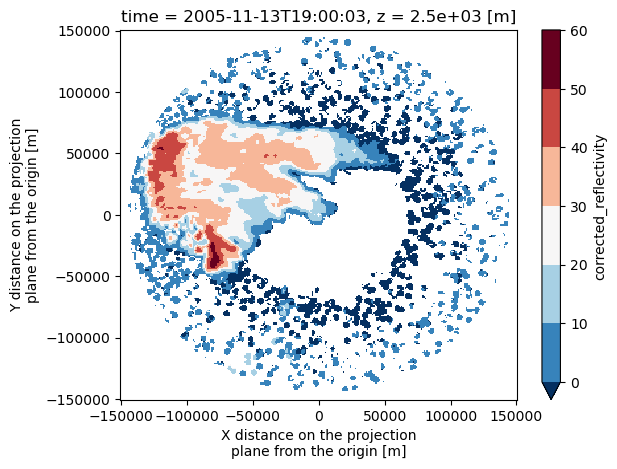

: 

In [ ]:
dataset['corrected_reflectivity'].isel(time=100).isel(z=5).plot(levels=np.arange(0, 70, 10))

In [ ]:
from thor.data.utils import unzip_url_contents

In [ ]:
with tempfile.TemporaryDirectory() as temp_dir:
    a, b = unzip_url_contents(urls[0], temp_dir)


2024-04-13 21:51:06,778 - thor.data.utils - DEBUG - Downloading https://dapds00.nci.org.au/thredds/fileServer/rq0/63/2005/vol/63_20051113.pvol.zip...


In [ ]:
sorted(a)

[PosixPath('/tmp/tmpylkx7lzy/63_20051113_022004.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_023004.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_024003.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_025003.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_030004.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_031004.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_032003.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_033004.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_034003.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_035004.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_040004.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_041004.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_042004.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_043003.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_044004.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_045004.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_050004.pvol.h5'

In [ ]:
urls[0]

'https://dapds00.nci.org.au/thredds/dodsC/rq0/level_1/odim_pvol/63/2005/vol/63_20051113.pvol.zip'

In [ ]:
ds = xr.open_dataset(urls[0], engine="netcdf4")

ds

<xarray.Dataset> Size: 16MB
Dimensions:       (time: 144, longitude: 117, latitude: 117)
Coordinates:
  * time          (time) datetime64[ns] 1kB 2005-11-13 ... 2005-11-13T23:50:00
  * longitude     (longitude) float32 468B 129.7 129.7 129.8 ... 132.4 132.4
  * latitude      (latitude) float32 468B -13.55 -13.53 -13.51 ... -10.97 -10.94
Data variables:
    isfile        (time) int32 576B ...
    reflectivity  (time, latitude, longitude) float64 16MB ...
Attributes: (12/42)
    title:                         Radar reflectivity
    summary:                       Daily timeseries of the equivalent reflect...
    source:                        radar
    date_created:                  2018-07-12T13:42:19.858084
    Conventions:                   CF-1.6, ACDD-1.3
    history:                       October 2017 recalibration: Thu Aug  3 11:...
    ...                            ...
    origin_longitude:              131.044
    origin_altitude:               50
    country:                       Australia
    state:                         NT
    site_name:                     Gunn Pt
    naming_authority:              au.org.nci

In [ ]:
ds["reflectivity"]

<xarray.DataArray 'reflectivity' (time: 1, z: 41, y: 117, x: 117)> Size: 2MB
[561249 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 8B 2005-11-13T12:00:09
  * x        (x) float64 936B -1.45e+05 -1.425e+05 ... 1.425e+05 1.45e+05
  * y        (y) float64 936B -1.45e+05 -1.425e+05 ... 1.425e+05 1.45e+05
  * z        (z) float64 328B 0.0 500.0 1e+03 1.5e+03 ... 1.9e+04 1.95e+04 2e+04
Attributes:
    long_name:              Reflectivity
    units:                  dBZ
    standard_name:          equivalent_reflectivity_factor
    coverage_content_type:  physicalMeasurement
    _ChunkSizes:            [  1  41 117 117]